## Machine Learning Online Class 
##  Exercise 7 Part 1 | K-Means Clustering
Requires : scipy, scikit-learn

### Introduction

In this exercise, we will implement the K-means clustering algorithm and apply it to compress an image.

### Python Imports

In [1]:
import time

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline

### K-means algorithm

The $K$-means algorithm is a method to automatically cluster similar data examples together.<br>

Concretely, you are given a training set $\{ x^{(1)}, \dotsc, x^{(m)} \}$ where $ x^{(i)} \in \mathbb{R}^n$, and want to group the data into a few cohesive "clusters".<br><br>
The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

To help implement K-Means, we have divided the learning algorithm into two functions : findClosestCentroids and computeCentroids.

### Part 1: Find Closest Centroids

In [2]:
# Load an example dataset
data = loadmat('ex7data2.mat')
X = data['X']

In [3]:
# Select an initial set of centroid
K = 3 # 3 centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [4]:
def findClosestCentroids(X, centroids):
    # vectorized way using broadcasting
    return np.argmin(np.sum((X[None,:,:]-centroids[:,None,:])**2,axis=-1), axis=0)            

In [5]:
idx = findClosestCentroids(X, initial_centroids)

In [6]:
print('Closest centroids for the first 3 examples :')
print(idx[0:3])

Closest centroids for the first 3 examples :
[0 2 1]


### Part 2: Compute Means

In [7]:
def computeCentroids(X, idx, K):
    
    centroids = np.zeros((K,X.shape[1]))
    
    for i in range(K):
        centroids[i,:] = np.mean(X[idx == i], axis = 0)
    
    return centroids    

In [8]:
centroids = computeCentroids(X, idx, K)

In [9]:
print('Centroids computed after initial finding of closest centroids :')
print(centroids)
print('\nThe centroids should be :')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids :
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

The centroids should be :
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### Part 3: K-Means Clustering

In [10]:
def runKmeans(X, initial_centroids, max_iters):
    
    # Notebook backend required for animation
    %matplotlib notebook
    
    K = initial_centroids.shape[0]    
    centroids = initial_centroids
    
    fig = plt.figure(figsize=(8,6))
    plt.ion() #Interactive mode on
    fig.show()
    fig.canvas.draw()
    
    for i in range(max_iters):
        plt.clf()
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        sub = fig.add_subplot(111)
        sub.set_title("Iteration : {:d}".format(i+1))

        sub.plot(X[:,0][idx==0],X[:,1][idx==0],'ro')
        sub.plot(centroids[0,0], centroids[0,1],'rx', ms = 15)
        sub.plot(X[:,0][idx==1],X[:,1][idx==1],'go')
        sub.plot(centroids[1,0], centroids[1,1],'gx', ms = 15)
        sub.plot(X[:,0][idx==2],X[:,1][idx==2],'bo')
        sub.plot(centroids[2,0], centroids[2,1],'bx', ms = 15)
        
        fig.canvas.draw()
        time.sleep(2)
    
    % matplotlib inline
    return idx

<IPython.core.display.Javascript object>


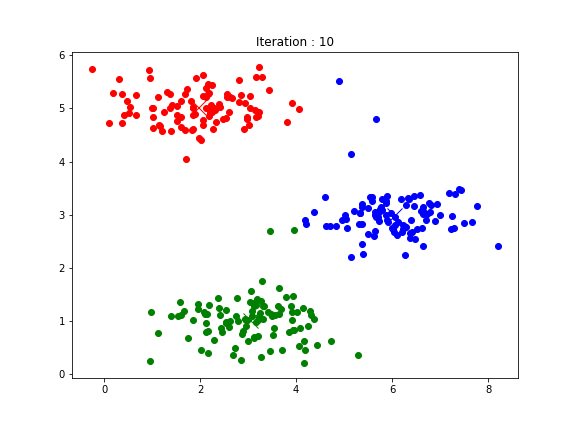

In [11]:
idx = runKmeans(X, initial_centroids, 10)

### K-means clustering with scikit

In [12]:
# Load an example dataset
data = loadmat('ex7data2.mat')
X = data['X']

In [13]:
# Select an initial set of centroid
K = 3 # 3 centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [14]:
# run K-means clustering with sklearn
kmeans = KMeans(n_clusters=K, init = initial_centroids, max_iter = 10).fit(X)

# get cluster id associated to each point
idx = kmeans.predict(X)

# get cluster centers
centroids = kmeans.cluster_centers_

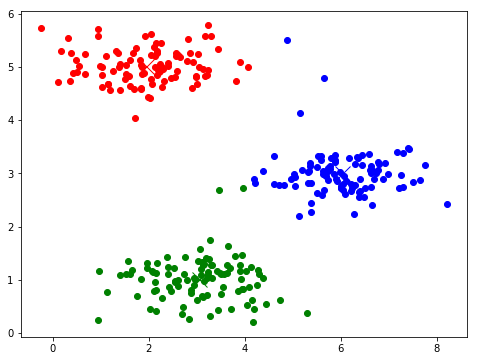

In [15]:
# Plot clusters

fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

sub.plot(X[:,0][idx==0],X[:,1][idx==0],'ro')
sub.plot(centroids[0,0], centroids[0,1],'rx', ms = 15)
sub.plot(X[:,0][idx==1],X[:,1][idx==1],'go')
sub.plot(centroids[1,0], centroids[1,1],'gx', ms = 15)
sub.plot(X[:,0][idx==2],X[:,1][idx==2],'bo')
sub.plot(centroids[2,0], centroids[2,1],'bx', ms = 15)


### Part 4: K-Means Clustering on Pixels
In this exercise, we will use K-Means to compress an image. <br>
To do this, wewill first run K-Means on the colors of the pixels in the image and then we will map each pixel onto its closest centroid.

#### Load an image of a bird

In [16]:
A = imread('bird_small.png')

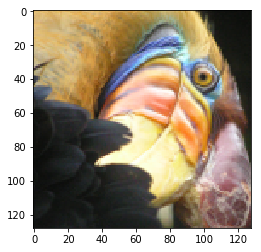

In [17]:
plt.imshow(A)

In [18]:
A = A / 255 # Divide by 255 so that all values are in the range 0 - 1

In [19]:
img_size = A.shape

In [20]:
img_size 

(128, 128, 3)

####  Reshape the image into an Nx3 matrix where N = number of pixels.
Each row will contain the Red, Green and Blue pixel values <br> This gives us our dataset matrix X that we will use K-Means on.

In [21]:
X = A.reshape(img_size[0]*img_size[1], 3)

In [22]:
# The shape is now (nb of pixels * 3 )
X.shape

(16384, 3)

#### Run K-means

In [23]:
K = 16
max_iters = 10

In [24]:
# run k means using k-means++ initialization (instead of random) whcih speeds up convergence
kmeans = KMeans(n_clusters=K, init ='k-means++' , max_iter = max_iters).fit(X)

### Part 5: Image Compression
In this part of the exercise, we will use the clusters of K-Means to
compress an image. <br> 
To do this, we first find the closest clusters for each example.

In [25]:
# We use built-in pairwise_distances_argmin_min metrics
idx, _ = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)

Essentially, now we have represented the image X as in terms of the indices in idx. <br>
We can now recover the image from the indices (idx) by mapping each pixel (specified by its index in idx) to the centroid value

In [26]:
X_recovered = kmeans.cluster_centers_[idx]

In [27]:
# Reshape to the original 
X_recovered  = X_recovered.reshape(img_size[0], img_size[1],3)

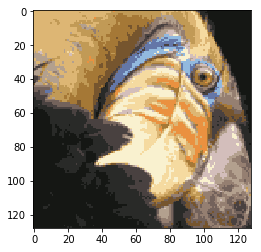

In [28]:
plt.imshow(X_recovered)

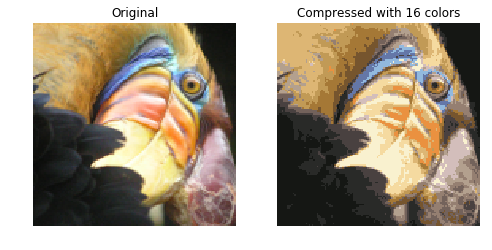

In [29]:
fig = plt.figure(figsize=(8,8))
original = fig.add_subplot(121, label = 'Original')
compressed = fig.add_subplot(122, label = 'Compressed')
original.axis('off')
compressed.axis('off')
original.set_title('Original')
compressed.set_title('Compressed with {:d} colors'.format(K))
original.imshow(imread('bird_small.png'))
compressed.imshow(X_recovered)
